# How to display decision tree in Jupyter Notebook, save to PNG and PDF file?

In [1]:
from sklearn import tree
X = [[0, 0], [1, 1]]
Y = [0, 1]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)
dot_data = tree.export_graphviz(clf, out_file=None)
print(type(dot_data))
print(dot_data)

<class 'str'>
digraph Tree {
node [shape=box] ;
0 [label="X[1] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]"] ;
1 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
}


# Display in Jupyter Notebook using *pydotplus*

In [2]:
def display_clf(clf, feature_names=None, class_names=None):
    dot_data = tree.export_graphviz(clf, feature_names=feature_names, class_names=class_names, filled=True, rounded=True, out_file=None)
    import pydotplus
    from IPython.display import Image, display
    graph = pydotplus.graph_from_dot_data(dot_data)
    display(Image(graph.create_png()))

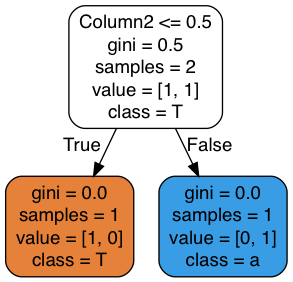

In [3]:
display_clf(clf, feature_names=['Column1','Column2'], class_names='Target')

In [4]:
# Save to png file

In [5]:
def save_png_clf(clf, filename, feature_names=None, class_names=None):
    dot_data = tree.export_graphviz(clf, feature_names=feature_names, class_names=class_names, filled=True, rounded=True, out_file=None)
    import pydotplus
    pydotplus.graph_from_dot_data(dot_data).write_png(filename)

In [6]:
save_png_clf(clf, 'a.png')

# Save to PDF file

In [7]:
# conda install python-graphviz
import graphviz
graph = graphviz.Source(dot_data) 
graph.render("iris")

'iris.pdf'